# BME 4760 HW 3

In [1]:
# Import necessary packages
import numpy as np
import pandas as pd

In [2]:
# Load data
df = pd.read_csv("HW3Data.csv",header = None)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000
0,0,2.080754,1.099069,0.927763,1.029081,-0.130763,1.265460,-0.436286,0.728881,2.107979,...,-0.825403,-0.138451,0.382957,0.876697,-0.216234,-1.408300,0.393327,-0.148522,1.591533,-0.217481
1,1,1.109457,0.786453,0.445560,-0.146323,-0.996316,0.555759,0.290734,-0.145259,1.132660,...,-1.056288,-0.205499,-1.815374,0.324373,-1.296909,-0.870757,1.108739,1.094010,-0.492141,-1.554079
2,0,-0.676530,1.693100,1.559247,1.559983,-0.982179,-1.358507,-1.313994,-0.455067,0.295214,...,1.242968,1.230157,-2.038999,2.366093,0.820656,1.404501,0.176860,-0.086285,-0.390878,-0.089465
3,1,0.534396,1.677537,1.489030,0.778605,-0.183776,-1.116850,-1.487557,-0.579511,0.292683,...,0.559852,-0.593149,-4.440577,1.720705,-0.124617,-0.435880,0.228440,-0.893938,1.005879,-0.631247
4,0,-1.018903,0.511080,0.755641,1.013816,0.529899,0.160440,-0.087055,1.295290,0.458736,...,0.227110,0.497628,-0.083921,-0.382733,-0.913389,1.122928,0.834571,-0.283786,-2.860340,0.280871


## Separate gene expression levels and labels

In [4]:
# Gene expression levels of 2000 genes taken from 62 samples
X = df.values[:,1:]

# labels indicating whether or not sample originated from a tumor biopsy
y = df.values[:,0]

## Preprocessing

In [5]:
from sklearn import preprocessing

### Assuming an underlying normal distribution, here the data is normalized such that the expression of each gene has 0 mean and unit variance. 

In [6]:
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)

In [7]:
%matplotlib inline
print(__doc__)

#Import packages
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

Automatically created module for IPython interactive environment


## Recursive Feature Elimination with Cross-Validation

Optimal number of features : 18


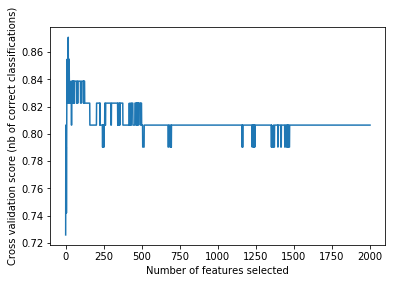

In [8]:
# Create the RFE object and compute a cross-validated score.
svc = SVC(kernel="linear")

# The "accuracy" scoring is proportional to the number of correct classifications
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(2),
              scoring='accuracy')

rfecv.fit(X, y=y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

#### According to the plot, there are 18 features that will yield the greatest performance. Only these 18  features will be used for testing using the "transform" function to reduce the data to the selected features.

In [ ]:
transformedX = rfecv.transform(X)
#print(transformedX.shape)
#print(y.shape)

### Using the holdout method, 80% of the preprocessed and feature selected data is used for training and the rest is reserved for testing

In [11]:
from sklearn.model_selection import train_test_split

# Split data into training and testing set (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(transformedX, y, test_size=0.2, random_state=1)

In [12]:
print("X_train shape: ", X_train.shape)
print("Y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("Y_test shape: ", y_test.shape)

X_train shape:  (49, 18)
Y_train shape:  (49,)
X_test shape:  (13, 18)
Y_test shape:  (13,)


In [14]:
rfecv.fit(X_train, y_train)
y_pred = rfecv.predict(X_test)
print('Test Accuracy: %.3f' % rfecv.score(X_test, y_test))

Test Accuracy: 1.000


#### Using these selected features yields a test accuracy of 100%. This abnormally large accuracy could be due to the feature selection because the entire dataset was used to find the best features (genes). This could make the model biased because the test data set was used to refine the initial training data.It could be argued that all of the genes may need to be taken into account in this context, however, as identifying the appropriate genes is decidedly crucial for this problem.  